### **Title: Crash Type Prediction Based on Road and Environmental Conditions**

* **Objective**: The goal of this analysis is to predict the crash_type based on various factors such as the traffic control device, weather conditions, lighting conditions, trafficway type, roadway surface conditions, and other relevant features related to the environment and crash circumstances. By understanding these contributing factors, we aim to gain insights into the patterns of different types of crashes and improve accident prevention strategies.

**Step-1 : Load the necessary libraries**

In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

**Step-2 : Load the data**

In [4]:
df = pd.read_csv("E:\\Machine Learning\\Datasets\\traffic_accidents.csv")
df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,...,most_severe_injury,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,07/29/2023 01:00:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,08/13/2023 12:11:00 AM,TRAFFIC SIGNAL,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
2,12/09/2021 10:30:00 AM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,DRY,NO DEFECTS,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,10,5,12
3,08/09/2023 07:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,ANGLE,FOUR WAY,STRAIGHT AND LEVEL,DRY,NO DEFECTS,INJURY AND / OR TOW DUE TO CRASH,...,NONINCAPACITATING INJURY,5.0,0.0,0.0,5.0,0.0,0.0,19,4,8
4,08/19/2023 02:55:00 PM,TRAFFIC SIGNAL,CLEAR,DAYLIGHT,REAR END,T-INTERSECTION,STRAIGHT AND LEVEL,UNKNOWN,UNKNOWN,NO INJURY / DRIVE AWAY,...,NO INDICATION OF INJURY,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8


In [5]:
df.shape

(209306, 24)

In [6]:
df.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

In [8]:
df_num = df.select_dtypes(include = [np.number])
df_cat = df.select_dtypes(include = ['object'])

print(df_num.columns)
print("-----------------------------------------------------")
print(df_cat.columns)

Index(['num_units', 'injuries_total', 'injuries_fatal',
       'injuries_incapacitating', 'injuries_non_incapacitating',
       'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
       'crash_day_of_week', 'crash_month'],
      dtype='object')
-----------------------------------------------------
Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'most_severe_injury'],
      dtype='object')


**Step-3 : Performing Correlation between all features and target variable**

In [9]:
from scipy.stats import f_oneway
def anova_correlation(df, target, numerical_features):
    for feature in numerical_features:
        # Create a list of groups based on the target category
        groups = [df[df[target] == category][feature] for category in df[target].unique()]
        
        # Perform ANOVA
        f_stat, p_value = f_oneway(*groups)
        print(f"ANOVA for {feature} with target: p-value = {p_value:.4f}")

# Run the ANOVA function
anova_correlation(df, 'crash_type', df_num.columns)

ANOVA for num_units with target: p-value = 0.0000
ANOVA for injuries_total with target: p-value = 0.0000
ANOVA for injuries_fatal with target: p-value = 0.0000
ANOVA for injuries_incapacitating with target: p-value = 0.0000
ANOVA for injuries_non_incapacitating with target: p-value = 0.0000
ANOVA for injuries_reported_not_evident with target: p-value = 0.0000
ANOVA for injuries_no_indication with target: p-value = 0.0000
ANOVA for crash_hour with target: p-value = 0.0000
ANOVA for crash_day_of_week with target: p-value = 0.0000
ANOVA for crash_month with target: p-value = 0.0000


In [10]:
from scipy.stats import f_oneway
from sklearn.preprocessing import LabelEncoder

def anova_correlation(df, target, categorical_features):
    le = LabelEncoder()
    df_encoded = df.copy()
    
    for feature in categorical_features:
        df_encoded[feature] = le.fit_transform(df[feature])
        
        groups = [df_encoded[df_encoded[target] == category][feature] for category in df_encoded[target].unique()]
        
        f_stat, p_value = f_oneway(*groups)
        print(f"ANOVA for {feature} with target: p-value = {p_value:.4f}")

anova_correlation(df, 'crash_type', df_cat.columns)

ANOVA for crash_date with target: p-value = 0.0000
ANOVA for traffic_control_device with target: p-value = 0.4893
ANOVA for weather_condition with target: p-value = 0.0000
ANOVA for lighting_condition with target: p-value = 0.0000
ANOVA for first_crash_type with target: p-value = 0.0000
ANOVA for trafficway_type with target: p-value = 0.0000
ANOVA for alignment with target: p-value = 0.0002
ANOVA for roadway_surface_cond with target: p-value = 0.0020
ANOVA for road_defect with target: p-value = 0.0000
ANOVA for crash_type with target: p-value = 0.0000
ANOVA for intersection_related_i with target: p-value = 0.0000
ANOVA for damage with target: p-value = 0.0000
ANOVA for prim_contributory_cause with target: p-value = 0.0000
ANOVA for most_severe_injury with target: p-value = 0.0000


C:\Users\gkris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\scipy\stats\_axis_nan_policy.py:573: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


* traffic_control_device has a p-value of 0.4893, which indicates no significant difference in means across the categories of the target. This suggests that the feature traffic_control_device does not significantly vary depending on the target variable.
* The warning you encountered (ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite) typically occurs when one of the groups has constant values for a feature. This can happen if all the values in a particular category for that feature are the same, leading to no variability in that group. When this happens, the ANOVA test cannot calculate a valid F-statistic or p-value because it needs variability between groups to determine statistical significance.

**Step-4 : Visualization of data columns** 

***1. Univariate Analysis***
* The graphs used in univariate analysis are Histogram, Boxplot, Violin plot, Density plot, Barplot, QQ plot, Pie chart, Countplot.

#### ***1. Boxplot***

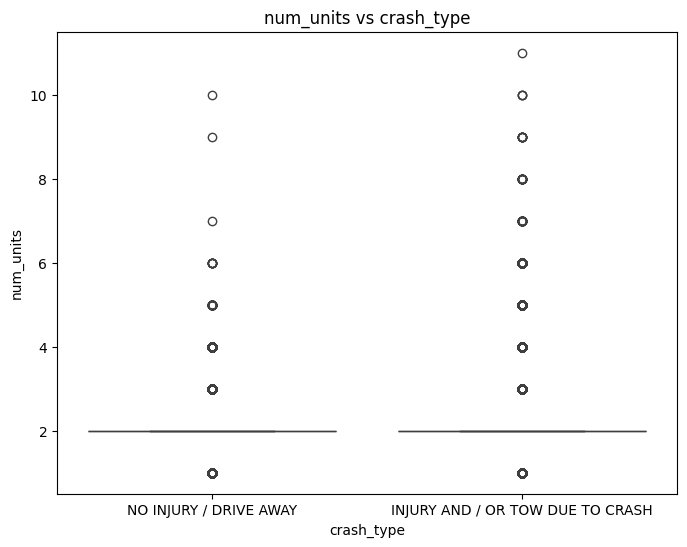

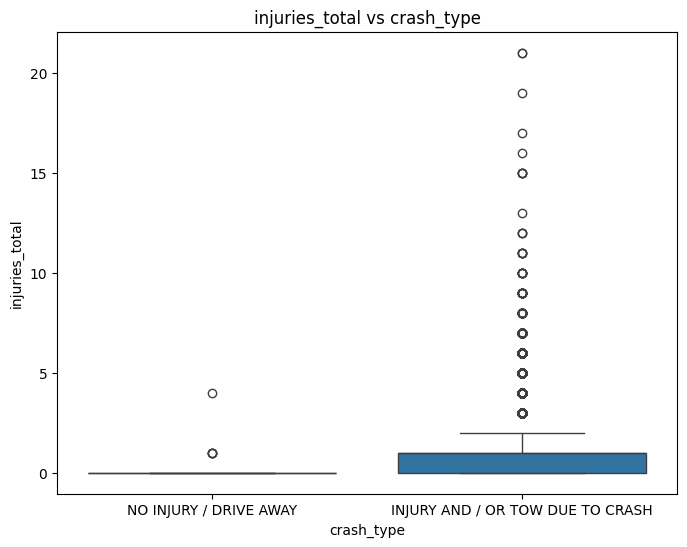

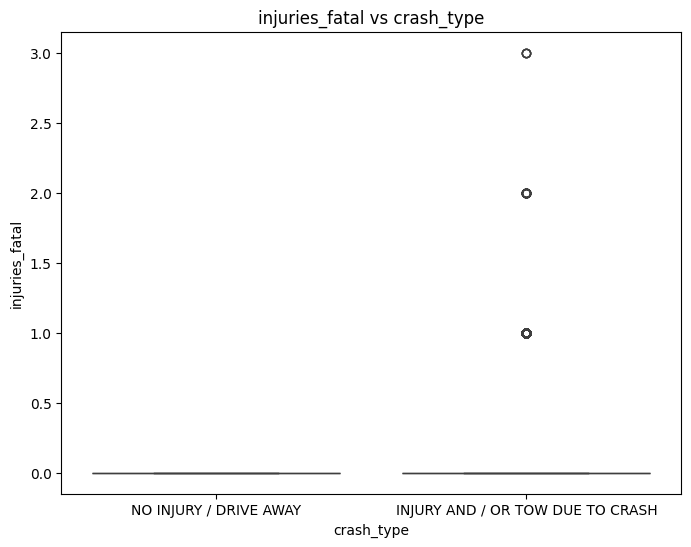

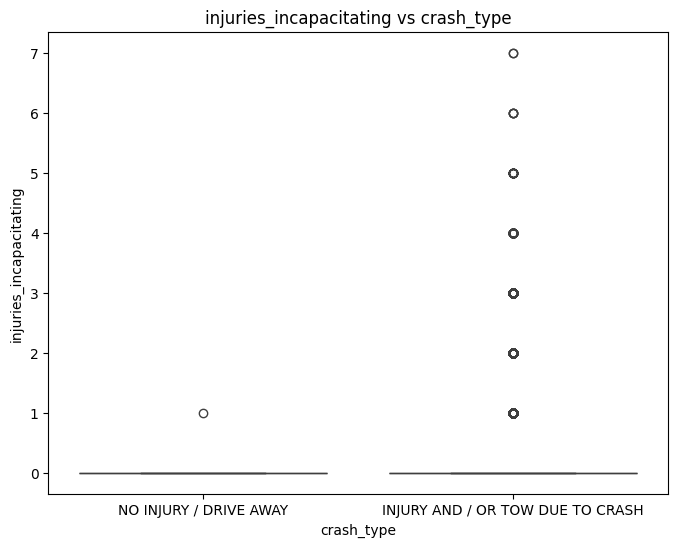

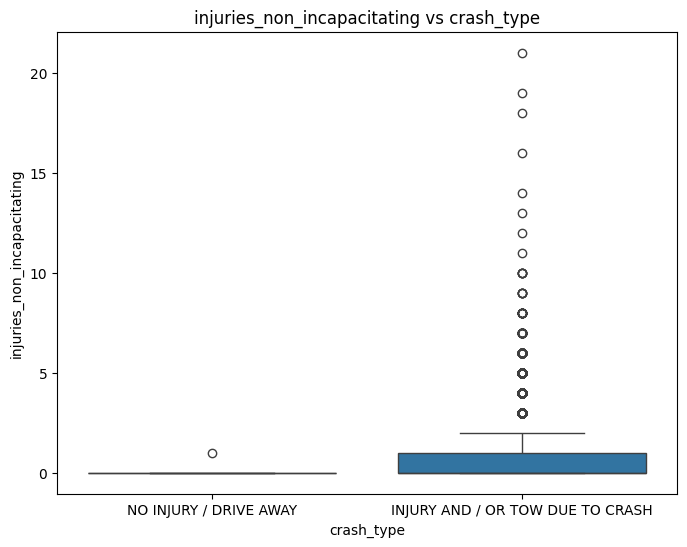

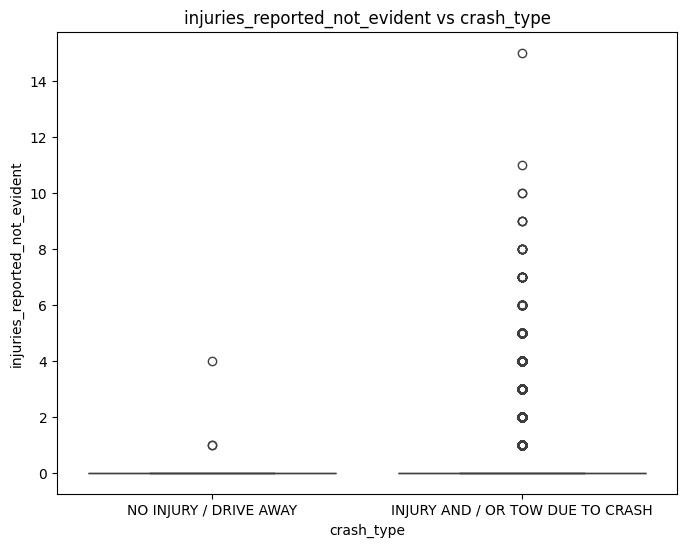

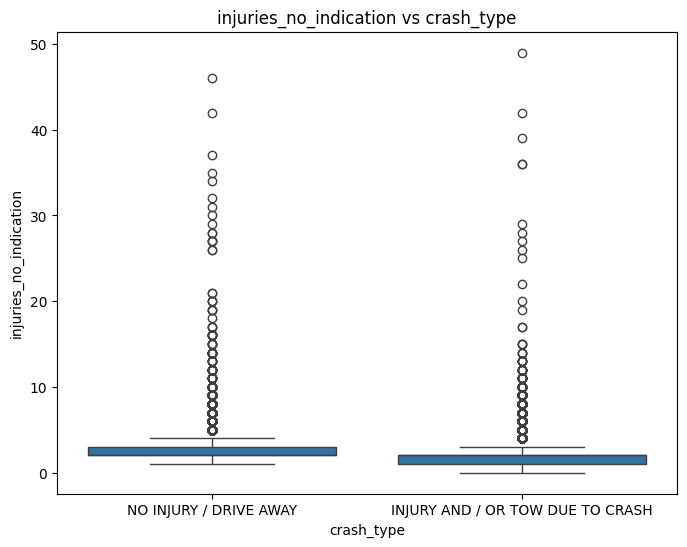

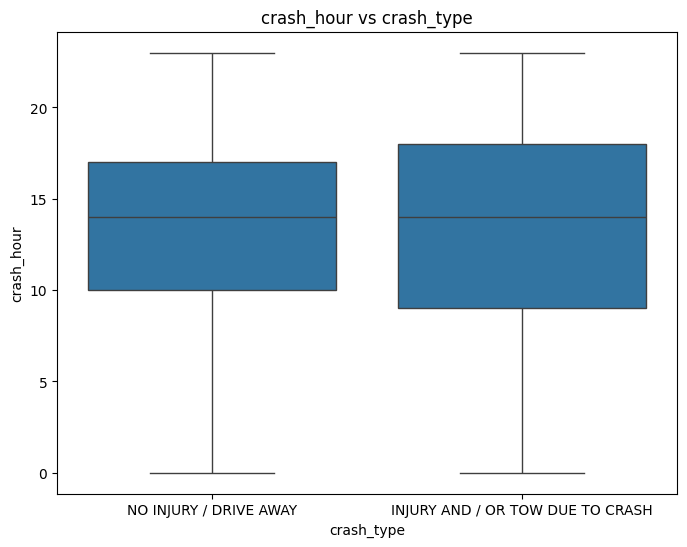

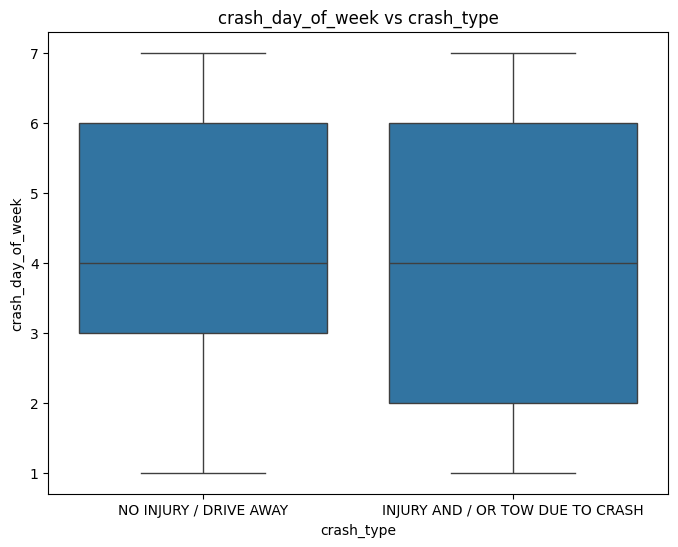

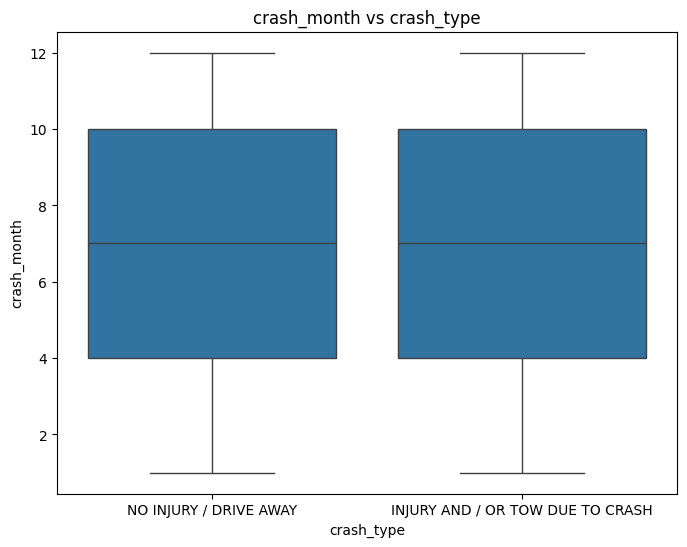

In [11]:
for feature in df_num.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='crash_type', y=feature, data=df)
    plt.title(f'{feature} vs crash_type')
    plt.show()


#### ***2. Histogram***

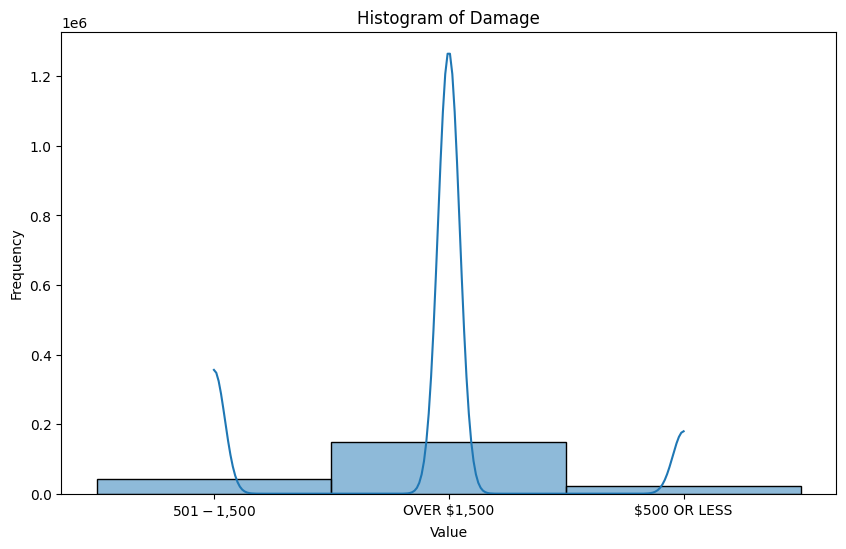

In [12]:
plt.figure(figsize = (10,6))
sns.histplot(df['damage'], kde = True, bins = 30)
plt.title("Histogram of Damage")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

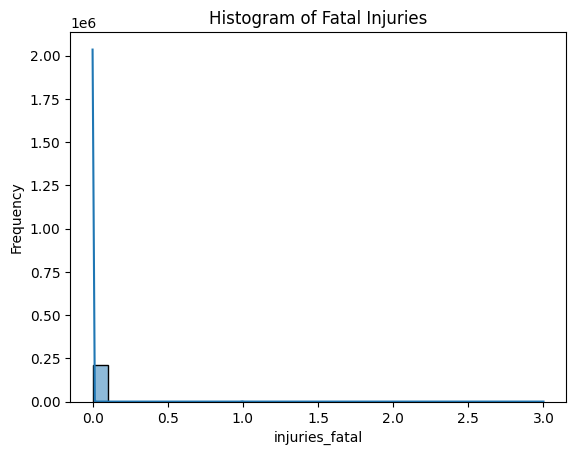

In [13]:
sns.histplot(df['injuries_fatal'], kde = True, bins = 30)
plt.title("Histogram of Fatal Injuries")
plt.xlabel("injuries_fatal")
plt.ylabel("Frequency")
plt.show()

#### ***3. Violinplot***

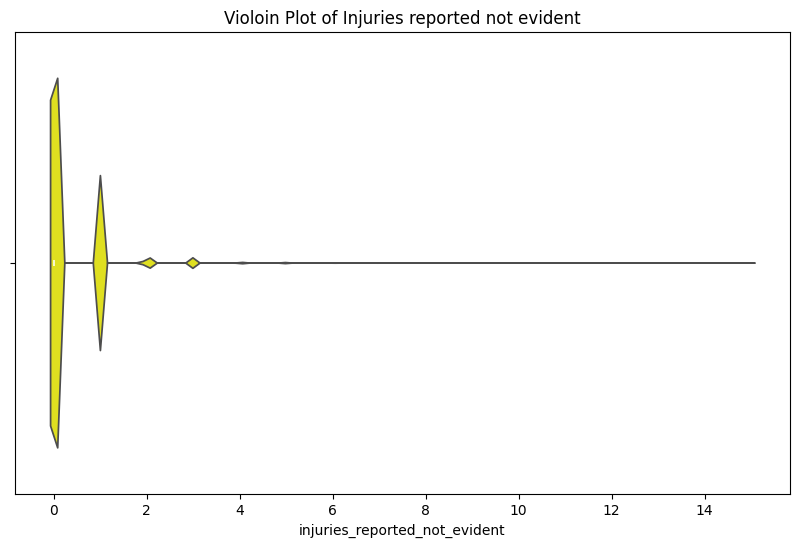

In [14]:
plt.figure(figsize = (10,6))
sns.violinplot(x = df['injuries_reported_not_evident'], color = 'yellow')
plt.title("Violoin Plot of Injuries reported not evident")
plt.show()

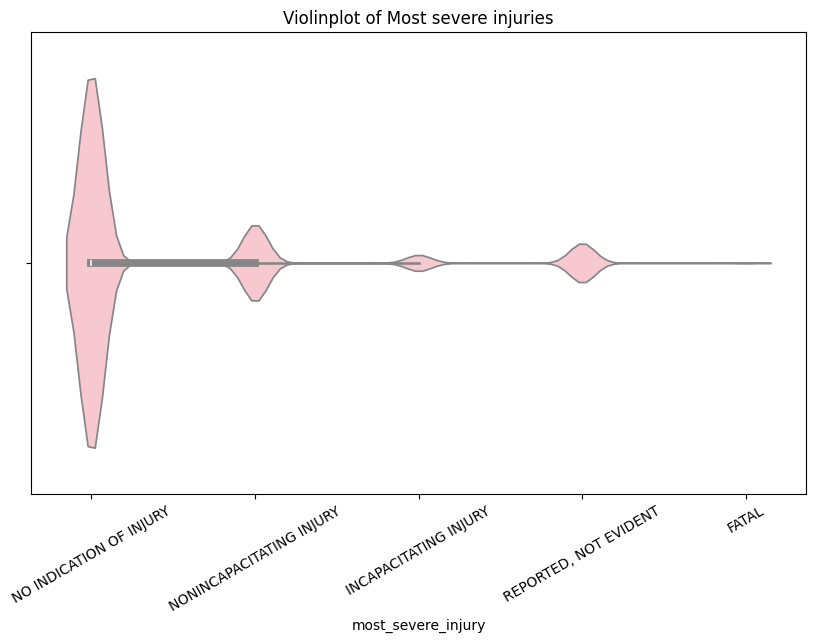

In [15]:
plt.figure(figsize = (10,6))
sns.violinplot(x = df['most_severe_injury'], color = 'pink')
plt.title("Violinplot of Most severe injuries")
plt.xticks(rotation = 30)
plt.show()

#### ***4. Countplot***

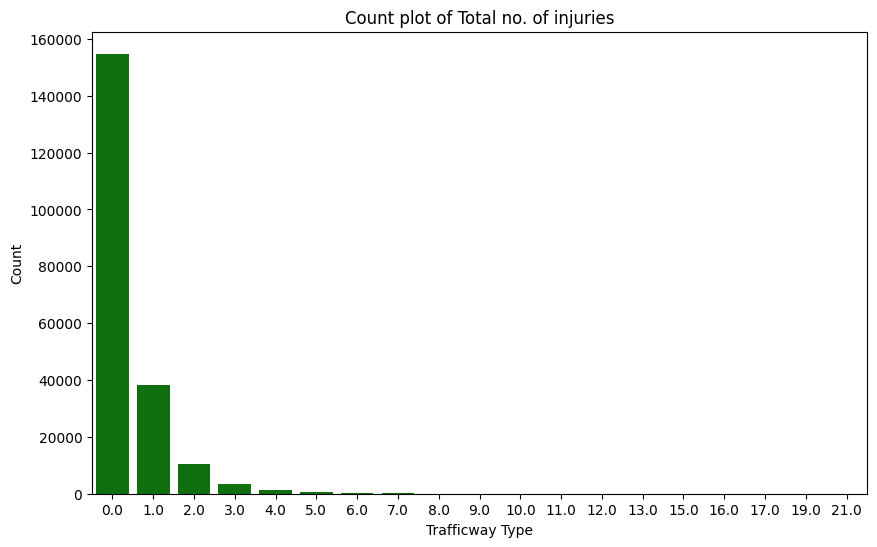

In [16]:
plt.figure(figsize = (10,6))
sns.countplot(x='injuries_total', data=df, color='green')
plt.title("Count plot of Total no. of injuries")
plt.xlabel("Trafficway Type")
plt.ylabel("Count")
plt.show()

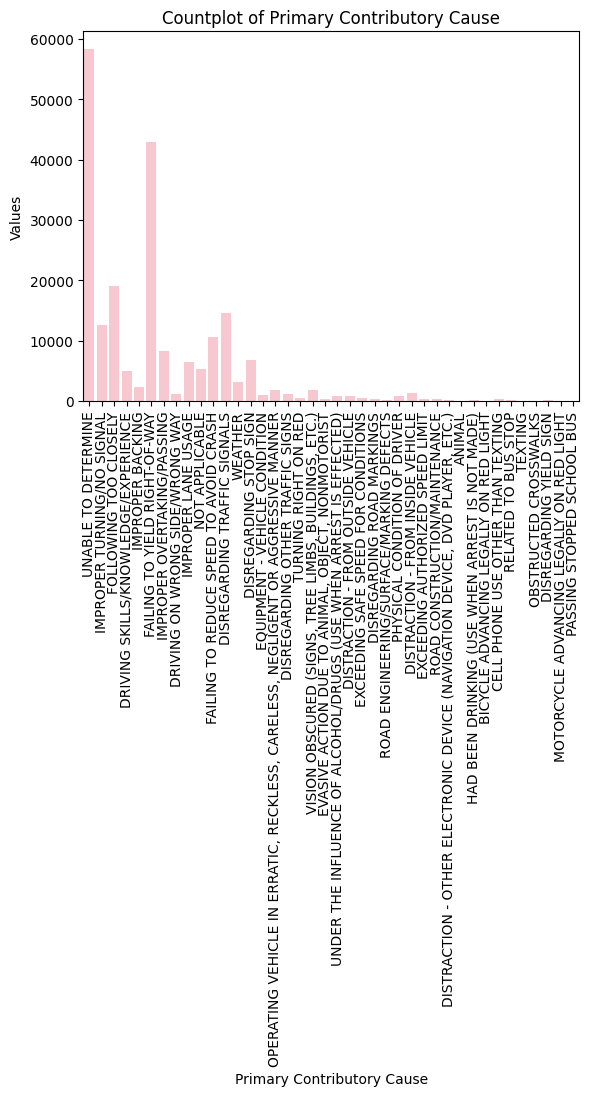

In [17]:
sns.countplot(x='prim_contributory_cause', data=df, color = 'pink')
plt.title("Countplot of Primary Contributory Cause")
plt.xlabel("Primary Contributory Cause")
plt.ylabel("Values")
plt.xticks(rotation=90)
plt.show()

#### ***5. Piechart***

In [18]:
df_cat.columns

Index(['crash_date', 'traffic_control_device', 'weather_condition',
       'lighting_condition', 'first_crash_type', 'trafficway_type',
       'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
       'intersection_related_i', 'damage', 'prim_contributory_cause',
       'most_severe_injury'],
      dtype='object')

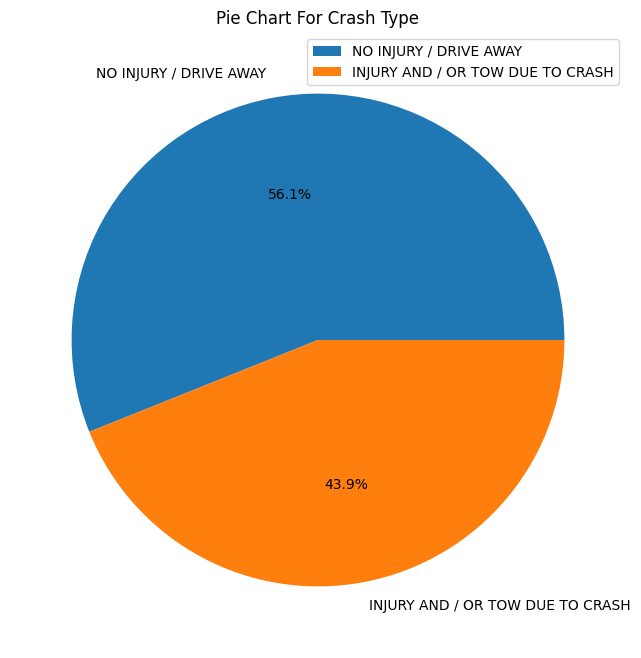

In [19]:
category_counts = df['crash_type'].value_counts()
category_counts.plot.pie(autopct="%1.1f%%", figsize=(8, 8))
plt.title("Pie Chart For Crash Type")
plt.ylabel('')
plt.legend(loc='upper right')
plt.show()

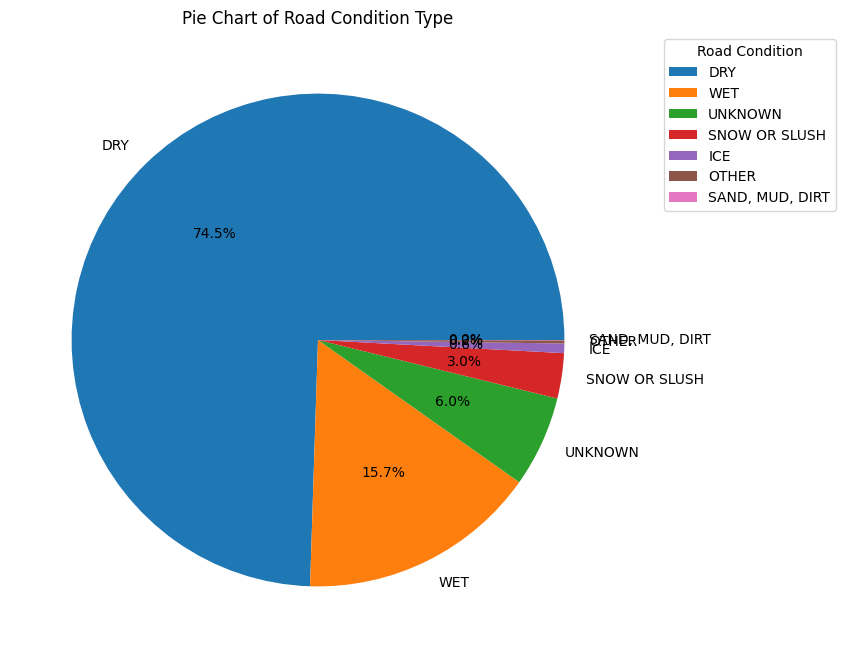

In [20]:
category_counts1 = df['roadway_surface_cond'].value_counts()
category_counts1.plot.pie(autopct = "%1.1f%%", figsize = (8,8))
plt.title("Pie Chart of Road Condition Type")
plt.ylabel('')
plt.legend(loc = 'upper right')
plt.legend(title='Road Condition', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

***2. Bivariate Analysis***
* Graphs used in Bivariate analysis are based on columns used.

* Numecial v/s Numercial : Scatterplot, Hexbin plot, Lineplot.
* Categorical v/s Numerical : Boxplot, Violin Plot, Barplot.
* Categorical v/s categorical : Stacked Bar chart, Mosaic plot, Heatmap, Contingency Table.

#### ***1. Scatterplot***

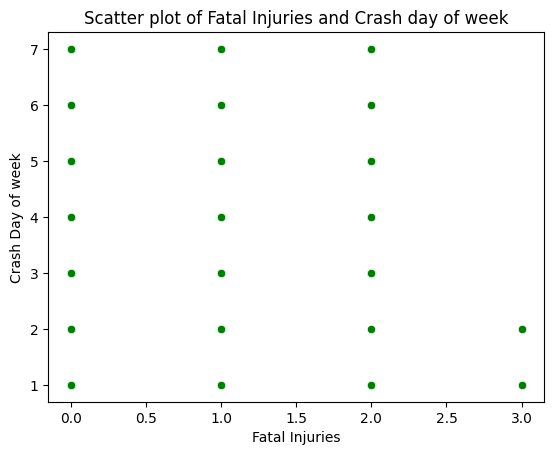

In [21]:
sns.scatterplot(x = df['injuries_fatal'], y = df['crash_day_of_week'], color = 'green')
plt.title('Scatter plot of Fatal Injuries and Crash day of week')
plt.xlabel("Fatal Injuries")
plt.ylabel("Crash Day of week")
plt.show()

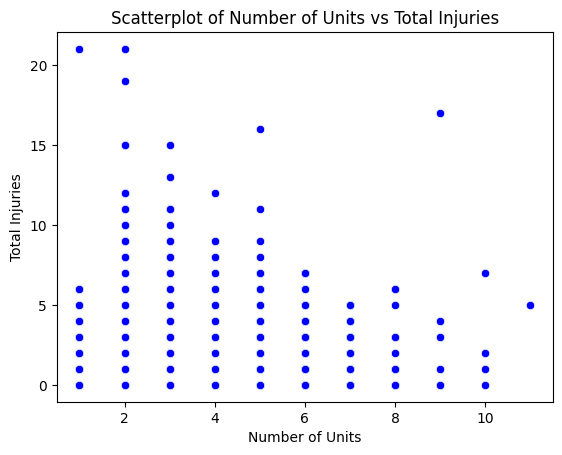

In [22]:
sns.scatterplot(x = df['num_units'], y = df['injuries_total'], color = 'blue')
plt.title("Scatterplot of Number of Units vs Total Injuries")
plt.xlabel("Number of Units")
plt.ylabel("Total Injuries")
plt.show()

#### ***2. Pairplot***

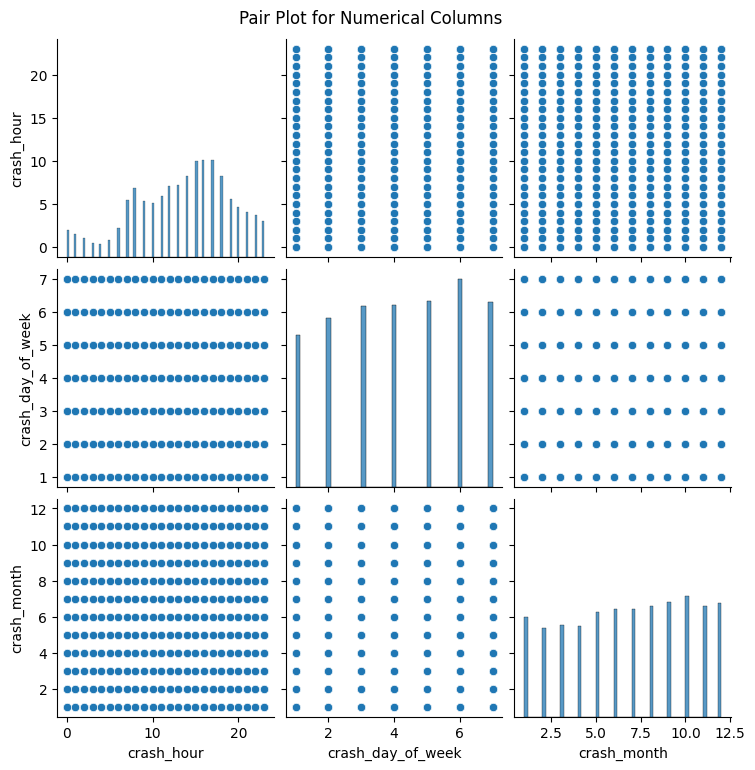

In [23]:
sns.pairplot(df[['crash_hour', 'crash_day_of_week', 'crash_month']])
plt.suptitle('Pair Plot for Numerical Columns', y=1.02)
plt.show()

#### ***3. SwarmPlot***

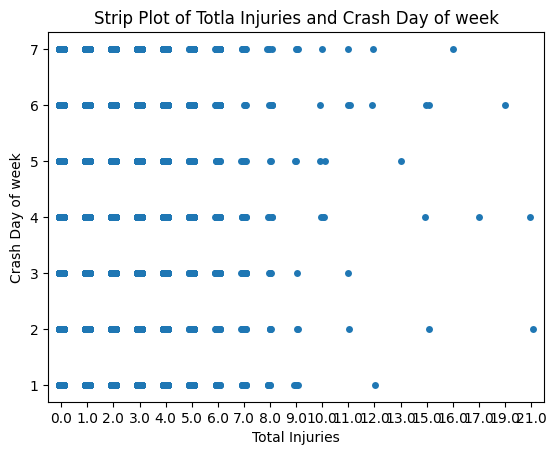

In [24]:
sns.stripplot(x='injuries_total', y='crash_day_of_week', data=df, jitter=True)
plt.title('Strip Plot of Totla Injuries and Crash Day of week')
plt.xlabel('Total Injuries')
plt.ylabel('Crash Day of week')
plt.show()

#### ***4.Point Plot***

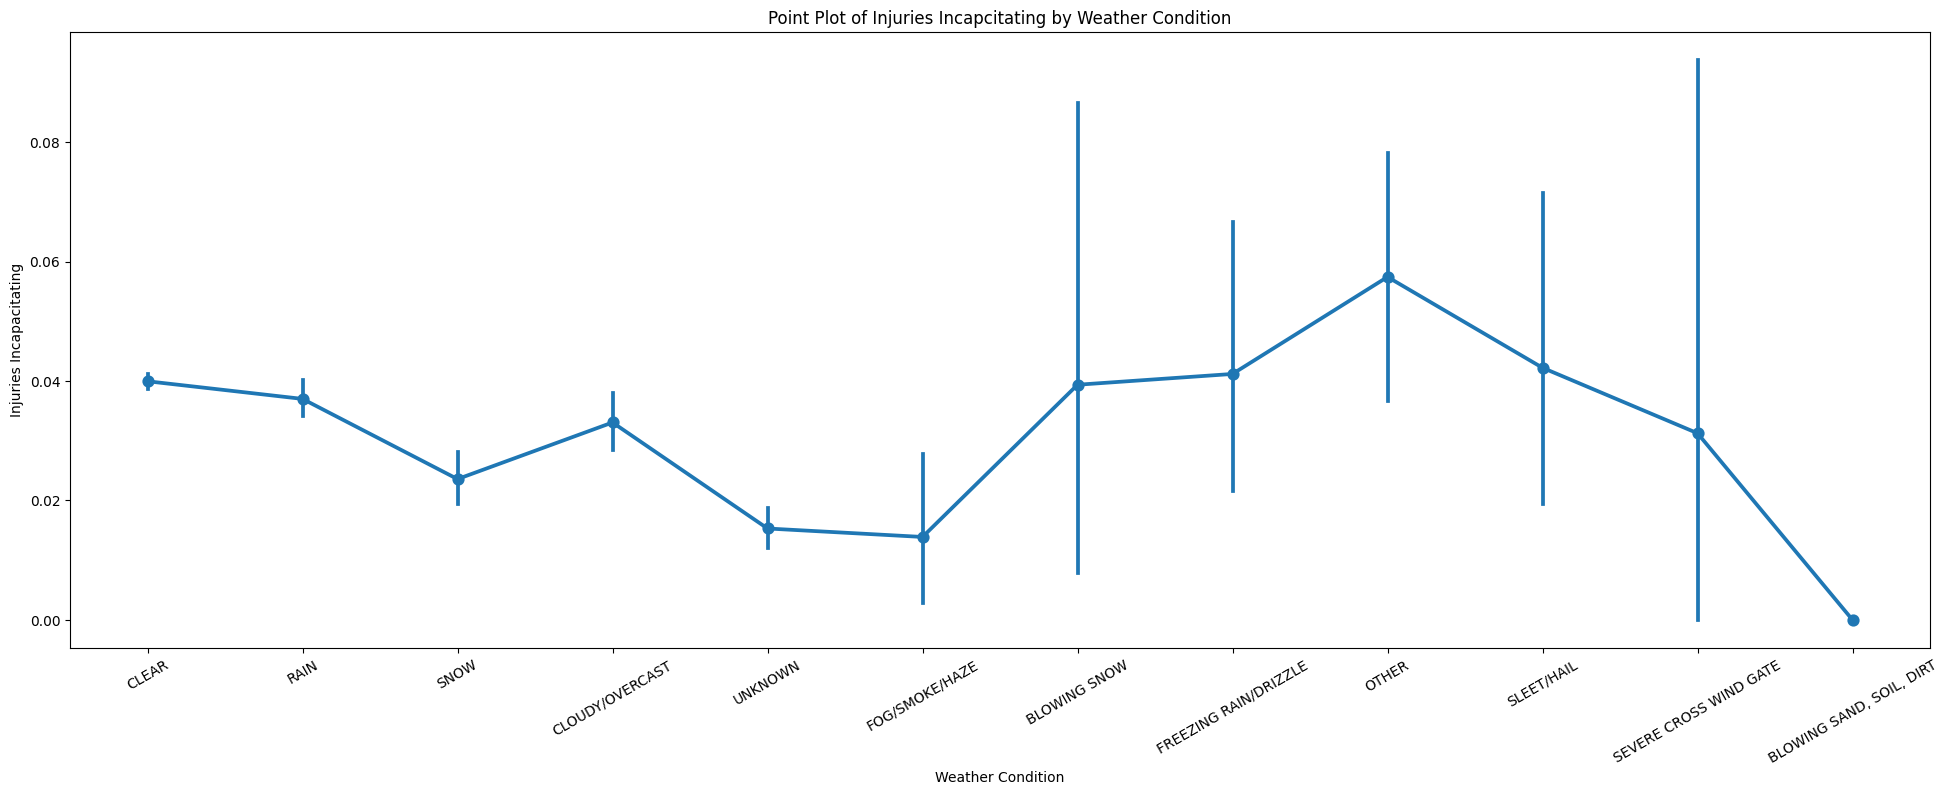

In [25]:
plt.figure(figsize = (24,8))
sns.pointplot(x='weather_condition', y='injuries_incapacitating', data=df)
plt.title('Point Plot of Injuries Incapcitating by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Injuries Incapacitating')
plt.xticks(rotation = 30)
plt.show()


#### ***5. Stacked Barplot***

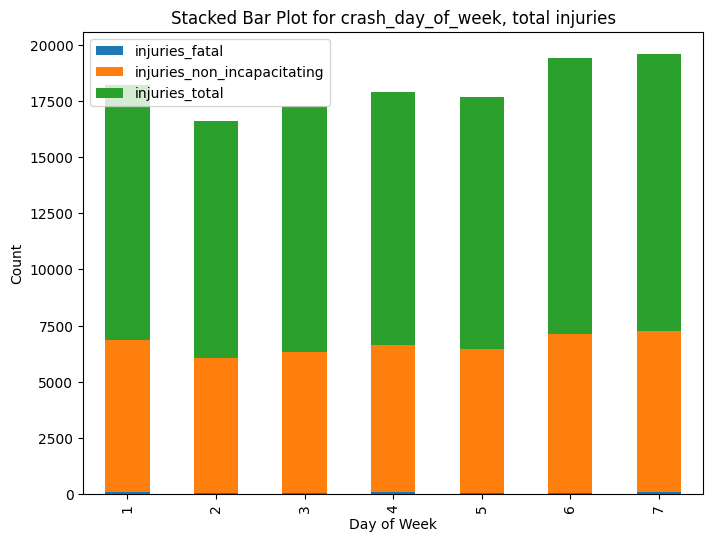

In [26]:
cross_tab = df.pivot_table(index='crash_day_of_week', values=['injuries_total', 'injuries_fatal', 'injuries_non_incapacitating'], aggfunc='sum')
cross_tab.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Stacked Bar Plot for crash_day_of_week, total injuries')
plt.xlabel('Day of Week')
plt.ylabel('Count')
plt.show()

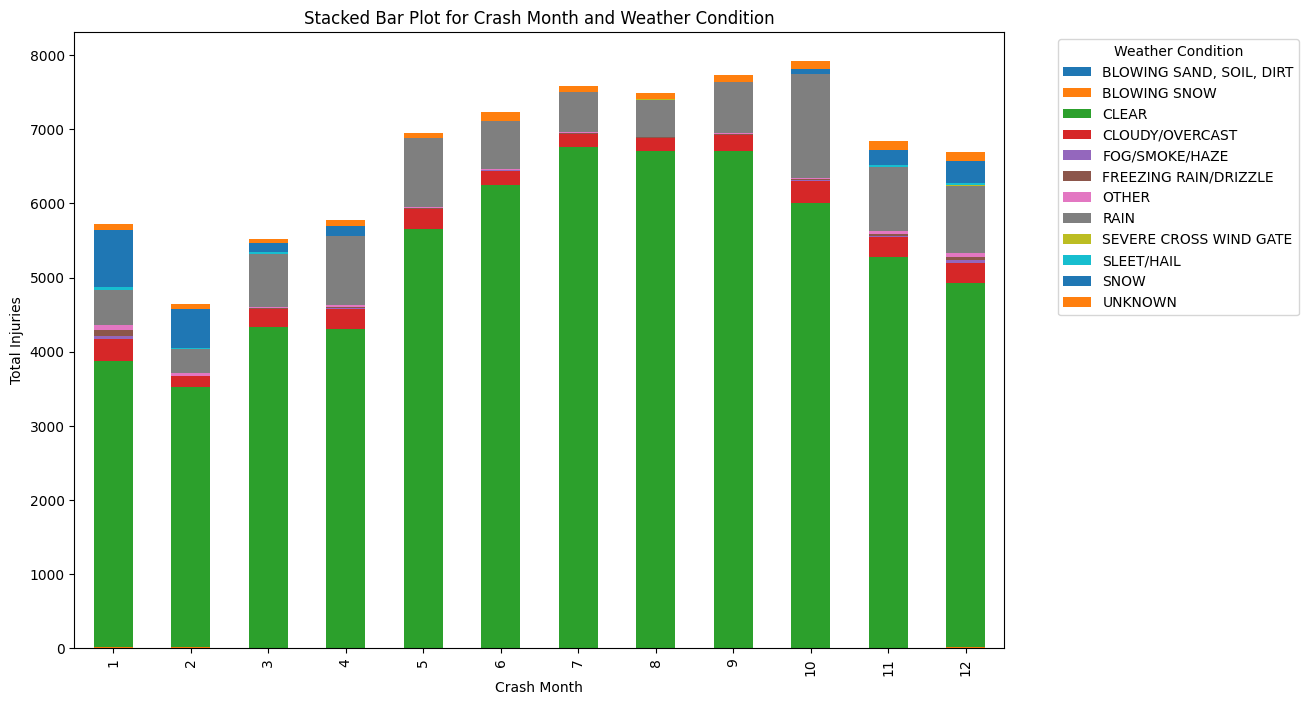

In [27]:
cross_tab_month_weather = df.pivot_table(index='crash_month', columns='weather_condition', values='injuries_total', aggfunc='sum')
cross_tab_month_weather.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Stacked Bar Plot for Crash Month and Weather Condition')
plt.xlabel('Crash Month')
plt.ylabel('Total Injuries')
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

#### ***6.Heatmap***

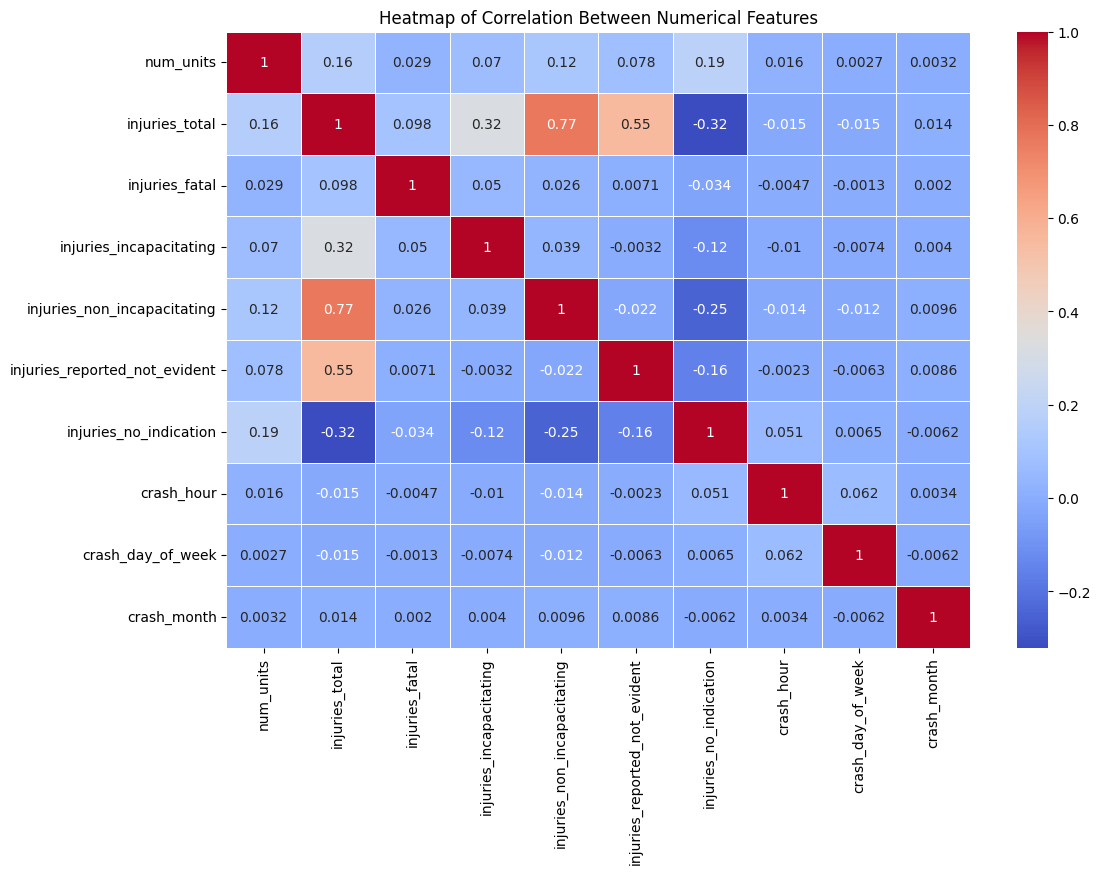

In [28]:
plt.figure(figsize=(12, 8))
correlation_matrix = df_num.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap of Correlation Between Numerical Features')
plt.show()

#### ***7. 3D-Scatterplot*** 

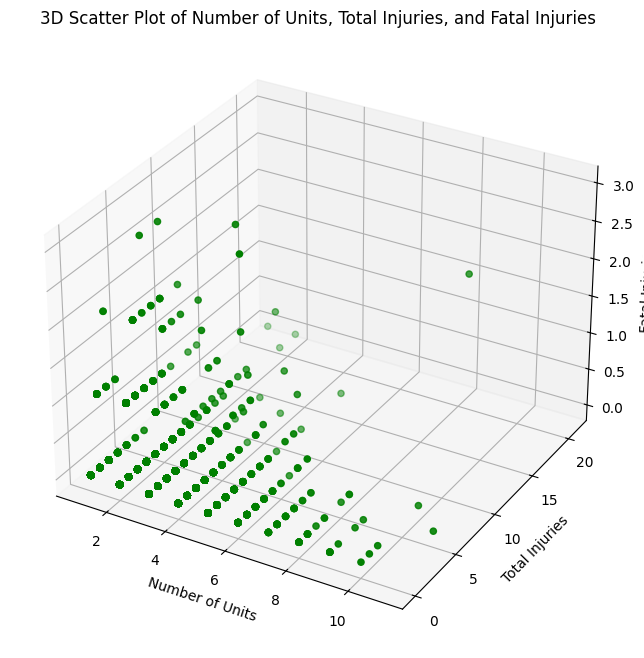

In [29]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['num_units'], df['injuries_total'], df['injuries_fatal'], c='g', marker='o')

ax.set_xlabel('Number of Units')
ax.set_ylabel('Total Injuries')
ax.set_zlabel('Fatal Injuries')

ax.set_title('3D Scatter Plot of Number of Units, Total Injuries, and Fatal Injuries')
plt.show()

**Step-5 : Encoding the Categorical Columns**

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encoded_df = df_cat.apply(le.fit_transform)
encoded_df.head()

,crash_date,traffic_control_device,weather_condition,lighting_condition,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,most_severe_injury
0,102748,16,2,3,17,8,3,5,5,1,1,1,36,2
1,110797,16,2,1,17,6,3,0,1,1,1,2,24,2
2,176858,16,2,3,10,15,3,0,1,1,1,1,19,2
3,108613,16,2,3,0,6,3,0,1,0,1,2,36,3
4,113911,16,2,3,10,15,3,5,5,1,1,1,12,2


**Step-6 : Removal of outliers by IQR in numerical columns**

In [31]:
def remove_outliers_iqr(df_num):
    for column in df_num.columns:
        Q1 = df_num[column].quantile(0.25)
        Q3 = df_num[column].quantile(0.75)
        IQR = Q3 -Q1
        lower_bound = Q1 - 1.5* IQR
        upper_bound = Q3 + 1.5* IQR
        df_num = df_num[(df_num[column] >= lower_bound) & (df_num[column] <= upper_bound)]
    return df_num
df_num_cleaned = remove_outliers_iqr(df_num)
df_num_cleaned.head()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month
0,2,0.0,0.0,0.0,0.0,0.0,3.0,13,7,7
1,2,0.0,0.0,0.0,0.0,0.0,2.0,0,1,8
4,2,0.0,0.0,0.0,0.0,0.0,3.0,14,7,8
6,2,0.0,0.0,0.0,0.0,0.0,2.0,11,3,12
8,2,0.0,0.0,0.0,0.0,0.0,3.0,18,2,6


In [32]:
final_df = pd.concat([df_num_cleaned, encoded_df], axis=1)

In [33]:
final_df.head()

,num_units,injuries_total,injuries_fatal,injuries_incapacitating,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,crash_hour,crash_day_of_week,crash_month,...,first_crash_type,trafficway_type,alignment,roadway_surface_cond,road_defect,crash_type,intersection_related_i,damage,prim_contributory_cause,most_severe_injury
0,2.0,0.0,0.0,0.0,0.0,0.0,3.0,13.0,7.0,7.0,...,17,8,3,5,5,1,1,1,36,2
1,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,8.0,...,17,6,3,0,1,1,1,2,24,2
4,2.0,0.0,0.0,0.0,0.0,0.0,3.0,14.0,7.0,8.0,...,10,15,3,5,5,1,1,1,12,2
6,2.0,0.0,0.0,0.0,0.0,0.0,2.0,11.0,3.0,12.0,...,11,6,3,0,1,1,1,1,21,2
8,2.0,0.0,0.0,0.0,0.0,0.0,3.0,18.0,2.0,6.0,...,10,8,3,0,1,1,1,2,19,2


**Step-7 : Splitting the data in to sets**

In [38]:
final_df = final_df.dropna()

In [39]:
x = final_df.drop(columns = ['crash_type'], axis=1)
y = final_df['crash_type']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

**Step-8 : Applying Logistic Regression**

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [42]:
model = LogisticRegression()
model.fit(X_train,y_train)

C:\Users\gkris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred = model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_test, y_pred)
print(f"precision_score: {precision:.2f}")

recall = recall_score(y_test, y_pred)
print(f"Recall Score :{recall:.2f}")

f1_score = f1_score(y_test, y_pred)
print(f"F1-score: {f1_score:.2f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.79
precision_score: 0.80
Recall Score :0.99
F1-score: 0.88
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.07      0.12      8696
           1       0.80      0.99      0.88     32064

    accuracy                           0.79     40760
   macro avg       0.68      0.53      0.50     40760
weighted avg       0.75      0.79      0.72     40760

Confusion Matrix:
[[  607  8089]
 [  478 31586]]


**Step-9 : Applying Decision Tree**

In [45]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier( random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [46]:
accuracy = clf.score(X_train, y_train)
accuracy

1.0

**Step-10 : Applying RandomForestClassifier**

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [48]:
y_pred = rf.predict(X_test)
accuracy1 = accuracy_score(y_test,y_pred)

In [49]:
accuracy1

0.7926153091265947

**Step-11 : Applying GradientBoost Classifier**

In [50]:
from sklearn.ensemble import GradientBoostingClassifier

In [53]:
# Step 3: Initialize the GradientBoostingClassifier
gb_clf = GradientBoostingClassifier(
    n_estimators=100,  # Number of boosting stages
    learning_rate=0.1,  # Shrinkage factor for contributions
    max_depth=3,       # Maximum depth of each tree
    random_state=42)

In [55]:
gb_clf.fit(X_train, y_train)
y_pred = gb_clf.predict(X_test)

accuracy2= accuracy_score(y_test, y_pred)

In [56]:
accuracy2

0.8005642787046123